In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import joblib
import time
np.random.seed(42)

In [2]:
path = "/scratch/pbanerj6/sml-dataset/"
trainSamples = 50000
n_iter = 1000
n_trainSamples = [100,500,1000,10000,20000,50000,75000]

In [4]:
def load_all(fname):
    return pickle.load(open(fname,"rb"))

#X_train_all = load_all(path+"X_train_all_90.pkl")
#X_val_all = load_all(path+"X_val_all_90.pkl")

X_train_all = load_all(path+"X_train_cls.p")
X_val_all = load_all(path+"X_val_cls.p")


In [7]:
def load_y(fname):
    return np.array(pickle.load(open(fname,"rb")))

y_train = load_y(path+"y_train.p")
y_val = load_y(path+"y_val.p")


In [6]:
# truncate train data

#X_train_all = X_train_all[0:trainSamples,:]
#y_train = y_train[0:trainSamples]

# unable to truncate .p


TypeError: list indices must be integers or slices, not tuple

In [23]:
#print (X_train_all[0].shape)
print (X_train_all.shape)
print (y_train.shape)
#print (X_train_all[0])
#print (max(X_train_all[0]))
#print (X_val_all[0].shape)
print (X_val_all.shape)
print (y_val.shape)
#print (X_val_all[0])
#print (max(X_val_all[0]))

(50000, 6000)
(50000,)
(15000, 6000)
(15000,)


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# cv=3 [1, 99, 949, 1999, 2499] done

parameters = {
     'n_neighbors':[ 349, 649, 1499]
 }

In [32]:
#gs_clf = GridSearchCV(svm.SVC(verbose=True,probability=True,cache_size=7000,max_iter=n_iter,gamma='auto',kernel='linear'), 
#                      parameters, cv=3, iid=True, n_jobs=10, verbose=2)
knn = KNeighborsClassifier()

gs_clf = GridSearchCV(knn, parameters, cv = 3, n_jobs=-1, verbose=50)


In [33]:
stime=time.time()
model = gs_clf.fit(X_train_all, y_train)
print ("GridSearchTime:",time.time()-stime)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 88.3min
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed: 88.7min remaining: 310.4min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 88.9min remaining: 177.7min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 89.4min remaining: 111.7min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed: 89.7min remaining: 71.7min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed: 90.4min remaining: 45.2min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 90.4min remaining: 25.8min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 90.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 90.9min finished
GridSearchTime: 5460.8536739349365


In [34]:
print (model.cv_results_)

print (model.best_score_)
print (model.best_params_)
print (model.best_estimator_)

{'mean_fit_time': array([2.51847863, 2.76331798, 2.83516542]), 'std_fit_time': array([0.22183537, 0.17095733, 0.29363065]), 'mean_score_time': array([1774.29273423, 1792.55617547, 1796.33507824]), 'std_score_time': array([15.65035027, 12.21882516, 15.88514241]), 'param_n_neighbors': masked_array(data=[349, 649, 1499],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 349}, {'n_neighbors': 649}, {'n_neighbors': 1499}], 'split0_test_score': array([0.632  , 0.631  , 0.62056]), 'split1_test_score': array([0.65264, 0.64528, 0.63944]), 'split2_test_score': array([0.66096, 0.6588 , 0.65268]), 'mean_test_score': array([0.64853333, 0.64502667, 0.63756   ]), 'std_test_score': array([0.01217426, 0.01135072, 0.01318015]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_train_score': array([0.66034, 0.65248, 0.6466 ]), 'split1_train_score': array([0.65822, 0.65686, 0.64616]), 'split2_train_score': array([0.64942, 0.6431 ,

In [40]:
def GridSearchCV_result_temp():
    k_vector= [349, 649,1499]
    accuracy_vector= [0.64853333, 0.64502667, 0.63756]
        
        
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(k_vector,accuracy_vector,label='Accuracy vs k',marker='o')
    
    plt.title("Accuracy vs K")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    fig.savefig("knn_k_vs_Acc_plot_CLS.png")
    print("Best accuracy= %.4f"%max(accuracy_vector))
    #print(accuracy_vector.index(max(accuracy_vector)))
    print("For k= %d"%k_vector[accuracy_vector.index(max(accuracy_vector))])

Best accuracy= 0.6485
For k= 349


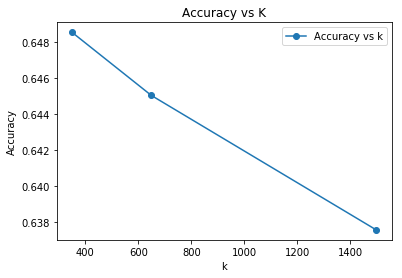

In [41]:
GridSearchCV_result_temp()


In [19]:
#pickle.dump(model,open("knn_cls_1_99_949_1999_2499"+str(trainSamples)+".pkl",'wb'))

In [38]:

def GridSearchCV_result():
    
    k_vector= [1, 99, 349, 649,
               949, 1499, 1999, 2499]
    accuracy_vector= [0.55550667, 0.65185333, 0.64853333, 0.64502667,
                      0.64345333, 0.63756,0.63437333, 0.63549333]
        
        
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(k_vector,accuracy_vector,label='Accuracy vs k',marker='o')
    
    plt.title("Accuracy vs K")
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    #fig.savefig("knn_k_vs_Acc_plot.png")
    print("Best accuracy= %.4f"%max(accuracy_vector))
    #print(accuracy_vector.index(max(accuracy_vector)))
    print("For k= %d"%k_vector[accuracy_vector.index(max(accuracy_vector))])

Best accuracy= 0.6519
For k= 99


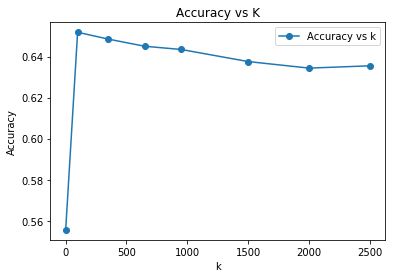

In [39]:
GridSearchCV_result()

In [21]:
#X_test_all = load_all(path+"X_test_all_90.pkl")
#y_test = load_y(path+"y_test.p")

X_test_all = load_all(path+"X_test_cls.p")
y_test = load_y(path+"y_test.p")

In [22]:
from scipy.stats import rankdata

def mrrs(out, labels):
#     print(out,labels)
    outputs = np.argmax(out,axis=1)
    mrr = 0.0 
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        mrr+=1/rank
    return mrr/len(labels)

def precision_at(out,labels,prank=1):
    count = 0
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        if rank <= prank:
            count+=1
    return count/len(labels)

def mrrwrapper(qid2c,qid2indexmap,preds_prob):
    labels = []
    out = []
    for qid in qid2c.keys():
        scores = []
        for ix in qid2indexmap[qid]:
            if len(scores) < 6:
                scores.append(preds_prob[ix][1])
        if len(scores) < 6:
            continue
        out.append(scores)
        labels.append(int(qid2c[qid]))
    return mrrs(np.array(out),labels),precision_at(np.array(out),labels,1),precision_at(np.array(out),labels,3)

def load_ranking(fname):
    return pickle.load(open(path+"ranking_"+fname+".p","rb"))

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
valAccuracy = []
testAccuracy = []
mrrScore = []
precisionAt1 = []
precisionAt3 = []

# redefine n_trainSamples[] and remove low values
n_trainSamples = [10000,20000,50000,75000]

# For each of training sample sizes
for eachTrain in n_trainSamples:
    
     # Choose optimum K from GridSearchCV results
    bestModel = KNeighborsClassifier(n_neighbors= model.best_params_['n_neighbors'],  algorithm='auto',n_jobs=-1)


    print("SampleSize:",eachTrain)
    
    stime=time.time()
    bestModel.fit(X_train_all[:eachTrain],y_train[:eachTrain])   
    print("Train Time:%.2f sec"%(time.time()-stime))
    
    stime=time.time()
    preds_val = bestModel.predict(X_val_all)
    accuracy = round(accuracy_score(y_val, preds_val),4)
    valAccuracy.append(accuracy)
    print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Validation Time:%.2f sec"%(time.time()-stime))

    stime=time.time()
    preds_test = bestModel.predict(X_test_all)
    accuracy = round(accuracy_score(y_test, preds_test),4)
    testAccuracy.append(accuracy)
    print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Test Time:%.2f sec"%(time.time()-stime))
    
    stime=time.time()
    preds_test_probs = bestModel.predict_proba(X_test_all)
    qid2c,qid2indexmap = load_ranking("test")
    print (mrrwrapper(qid2c,qid2indexmap,preds_test_probs))
    mrr, pAt1, pAt3 = mrrwrapper(qid2c,qid2indexmap,preds_test_probs)
    mrrScore.append(mrr)
    print("MRR:",mrr)
    print("MRR Time:%.2f sec"%(time.time()-stime))
    print("------------------------------------")
    precisionAt1.append(pAt1)
    precisionAt3.append(pAt3)
    

print ("Val accuracy:")
print (valAccuracy)
print ("Test accuracy:")
print (testAccuracy)
print ("MRR score:")
print (mrrScore)
print ("precision At1:")
print (precisionAt1)
print ("precision At3:")
print (precisionAt3)

SampleSize: 10000
Train Time:0.41 sec
Validation Accuracy: 59.16%
Validation Time:35.50 sec
Test Accuracy: 58.93%
Test Time:35.21 sec
(0.5043854737854735, 0.24133333333333334, 0.6533333333333333)
MRR: 0.5043854737854735
MRR Time:35.31 sec
------------------------------------
SampleSize: 20000
Train Time:0.92 sec
Validation Accuracy: 60.57%
Validation Time:68.82 sec
Test Accuracy: 59.21%
Test Time:68.98 sec
(0.5118359788359793, 0.25266666666666665, 0.6726666666666666)
MRR: 0.5118359788359793
MRR Time:69.29 sec
------------------------------------
SampleSize: 50000
Train Time:2.38 sec
Validation Accuracy: 60.53%
Validation Time:158.74 sec
Test Accuracy: 59.88%
Test Time:158.74 sec
(0.5363150553150561, 0.2813333333333333, 0.6846666666666666)
MRR: 0.5363150553150561
MRR Time:158.88 sec
------------------------------------
SampleSize: 75000
Train Time:4.08 sec
Validation Accuracy: 61.97%
Validation Time:259.14 sec
Test Accuracy: 60.87%
Test Time:260.13 sec
(0.5473740740740753, 0.3, 0.698)
M

In [25]:
def accuracyVisualization():
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,testAccuracy,label='TestAccuracy vs TrainData',marker='o')
    ax.plot(n_trainSamples,valAccuracy,label='ValAccuracy vs TrainData',marker='x')
    plt.title("Accuracy vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("Accuracy")
    fig.savefig("knn99_cls_Accuracy.png")
    #plt.show()

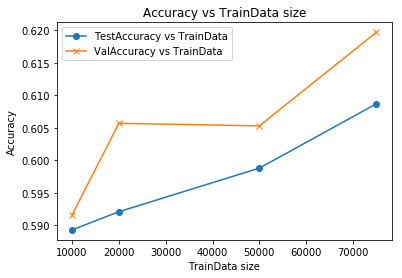

In [26]:
accuracyVisualization()

In [27]:
def mrrVisualization():
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,mrrScore,label='MRR vs TrainData',marker='x')
    plt.title("MRR vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("MRR")
    fig.savefig("knn99_cls_Mrr.png")
    #plt.show()

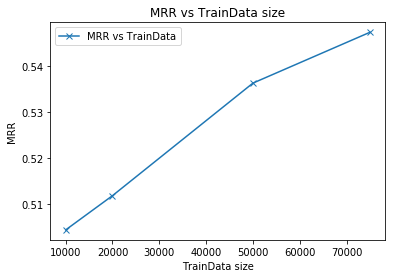

In [28]:
mrrVisualization()

In [29]:
def precisionVisualization():
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,precisionAt1,label='Precision@1 vs TrainData',marker='o')
    ax.plot(n_trainSamples,precisionAt3,label='Precision@3 vs TrainData',marker='x')
    plt.title("Precision vs TrainData size")
    plt.legend()
    plt.xlabel("TrainData size")
    plt.ylabel("Precision")
    fig.savefig("knn99_cls_Precision.png")
    #plt.show()

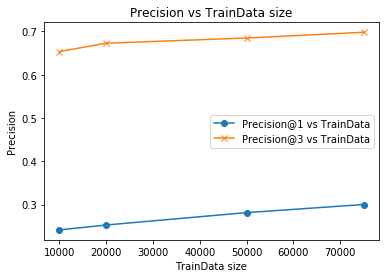

In [30]:
precisionVisualization()